<a href="https://colab.research.google.com/github/teazaw/MAT422-Mathematical-Methods-in-Data-Science/blob/main/HW12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4.2 Spectral Graph Bipartitioning**
**Graph partitioning** aims to determine a partition such that the cut is minimized. For context, a **cut** is the total number of edges between two disjoint sets of nodes. For a weighted graph *G = (V, E)*, given a bipartition of V into disjoint *V1* and *V2 (V1 U V2 =V)*, the cut between them can be defined as:

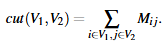

**Bipartitioning** is the simplest form of graph partioning, where the graph is divided into exactly two subsets. The goal is to minimize the number of edges between the two partitions while keeping the partitions balanced. The partition vector *p* appears as:

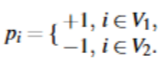

**Spectral partitioning** uses the eigenvectors of the graph's Laplacian matrix to determine a good partition. The **Fiedler vector** (second smallest eigenvector) helps in bipartitioning the graph based on the sign of its components. The **Rayleigh quotient** can be used to find the smallest eigenvalues of the real symmetric matrix *A* through optimization techniques.

In the following coding example, we create a graph with 10 nodes and a probability of 0.3 for edge creation. The Laplacian matrix is then computed, as well as the Fieldler vector. The nodes are then partitioned based on the sign of the Fiedler vector's entries.

Partition 1: [0, 4]
Partition 2: [1, 2, 3, 5, 6, 7, 8, 9]


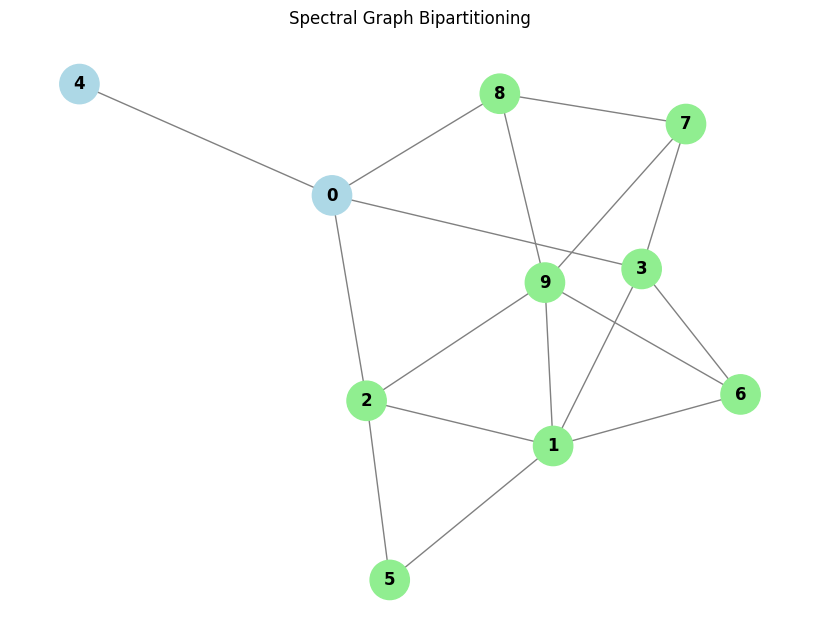

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh

# creation of simple graph
G = nx.erdos_renyi_graph(n=10, p=0.3, seed=42)

# Laplacian matrix
L = nx.laplacian_matrix(G).astype(float)

# compute eigenvectors and fiedler vectors
eigenvalues, eigenvectors = eigsh(L, k=2, which='SM')
fiedler_vector = eigenvectors[:, 1]

# partition nodes
partition_1 = [node for i, node in enumerate(G.nodes()) if fiedler_vector[i] >= 0]
partition_2 = [node for i, node in enumerate(G.nodes()) if fiedler_vector[i] < 0]
print("Partition 1:", partition_1)
print("Partition 2:", partition_2)

# visualization
color_map = []
for node in G:
    if node in partition_1:
        color_map.append('lightblue')
    else:
        color_map.append('lightgreen')

plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color=color_map, edge_color='gray', node_size=800, font_weight='bold')
plt.title("Spectral Graph Bipartitioning")
plt.show()


Applications of spectral graph partitioning include...
1. **Data clustering**: This can be used for clustering in machine learning where similar data points are grouped together based on their relationships.
2. **Image segmentation**: This can be used in medical imaging.
3. **Biological network analysis**: This can be used in identifying communities in protein interaction networks.